In [1]:
from scripts.model import TrainingModule
from scripts.dataset import StockDataModule, load_stock_data
from scripts.utils import market_index, stock_feat_num_dims
from scripts.feature_generator import generate_and_save_features_files

from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pathlib import Path

# Generate Features

In [4]:
# Take raw OHLCV from raw_data_dir, generate feature files and save in features_data_dir

raw_data_dir = Path("./data/raw") 
features_data_dir = Path("./data/features")

generate_and_save_features_files(raw_data_dir, features_data_dir, pct=0.55)

# Define and train model

In [8]:
market_index_name = 'SPY'
data_dir = './data/features' #features_data_dir
train_date=('2007-01-01', '2015-01-01')
val_date=('2015-01-01', '2016-01-01')
test_date=('2016-01-01', '2017-01-01') 
batch_size=16
seq_len=10 # length of the window processed by the LSTM

beta_hyp = 0.1 # Hyperparameter \beta 
global_context_index =  market_index(data_dir, market_index_name)
input_dim, num_stocks = stock_feat_num_dims(data_dir)
hidden_dim = 64
num_heads = 1 
num_layers = 1
pos_weight_factor = 3#calculate_class_ratio(features_data_dir)
learning_rate=1e-3
lambda_reg=1e-2

In [9]:
data_module = StockDataModule(
    data_dir,
    train_date,
    val_date,
    test_date,
    batch_size,
    seq_len
)

data_module.setup()

In [10]:
training_module = TrainingModule(
    beta_hyp=beta_hyp,
    global_context_index=global_context_index,  
    input_dim=input_dim,  # The number of features per stock.
    hidden_dim=hidden_dim,  # Size of the hidden layers.
    num_stocks=num_stocks,
    num_heads=num_heads,  # Number of attention heads.
    num_layers=num_layers,  # Number of LSTM layers.
    pos_weight_factor = pos_weight_factor,
    learning_rate=learning_rate,
    lambda_reg=lambda_reg
)

In [15]:
checkpoint_dir = "./model_checkpoint/"

checkpoint_callback = ModelCheckpoint(
    monitor='val_prec',  # metric for monitoring
    mode='max',  
    save_top_k=1,  # save best only
    filename='best-{epoch:02d}-{val_prec:.2f}',
    dirpath=checkpoint_dir,  
    verbose=True
)

trainer = Trainer(
    max_epochs=40,
    #check_val_every_n_epoch=2,
    callbacks=[checkpoint_callback]
  )

trainer.fit(training_module, data_module)            

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/dima/anaconda3/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /media/dima/7E2EBB742EBB2455/trad/other_authors/DTML/model_checkpoint exists and is not empty.

  | Name             | Type            | Params
-----------------------------------------------------
0 | model            | DTML            | 86.1 K
1 | accuracy_metric  | BinaryAccuracy  | 0     
2 | precision_metric | BinaryPrecision | 0     
-----------------------------------------------------
86.1 K    Trainable params
0         Non-trainable params
86.1 K    Total params
0.344     Total estimated model params size (MB)


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 0, global step 124: 'val_prec' reached 0.34706 (best 0.34706), saving model to '/media/dima/7E2EBB742EBB2455/trad/other_authors/DTML/model_checkpoint/best-epoch=00-val_prec=0.35.ckpt' as top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 1, global step 248: 'val_prec' reached 0.35865 (best 0.35865), saving model to '/media/dima/7E2EBB742EBB2455/trad/other_authors/DTML/model_checkpoint/best-epoch=01-val_prec=0.36.ckpt' as top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 2, global step 372: 'val_prec' reached 0.43379 (best 0.43379), saving model to '/media/dima/7E2EBB742EBB2455/trad/other_authors/DTML/model_checkpoint/best-epoch=02-val_prec=0.43.ckpt' as top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 3, global step 496: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 4, global step 620: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 5, global step 744: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 6, global step 868: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 7, global step 992: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1116: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 9, global step 1240: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 10, global step 1364: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 11, global step 1488: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 12, global step 1612: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 13, global step 1736: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 14, global step 1860: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 15, global step 1984: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 16, global step 2108: 'val_prec' reached 0.43441 (best 0.43441), saving model to '/media/dima/7E2EBB742EBB2455/trad/other_authors/DTML/model_checkpoint/best-epoch=16-val_prec=0.43.ckpt' as top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 17, global step 2232: 'val_prec' reached 0.47708 (best 0.47708), saving model to '/media/dima/7E2EBB742EBB2455/trad/other_authors/DTML/model_checkpoint/best-epoch=17-val_prec=0.48.ckpt' as top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 18, global step 2356: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 19, global step 2480: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 20, global step 2604: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 21, global step 2728: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 22, global step 2852: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 23, global step 2976: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 24, global step 3100: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 25, global step 3224: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 26, global step 3348: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 27, global step 3472: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 28, global step 3596: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 29, global step 3720: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 30, global step 3844: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 31, global step 3968: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 32, global step 4092: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 33, global step 4216: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 34, global step 4340: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 35, global step 4464: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 36, global step 4588: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 37, global step 4712: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 38, global step 4836: 'val_prec' was not in top 1


Validation: |                                             | 0/? [00:00<?, ?it/s]

Epoch 39, global step 4960: 'val_prec' was not in top 1
`Trainer.fit` stopped: `max_epochs=40` reached.


# Test model

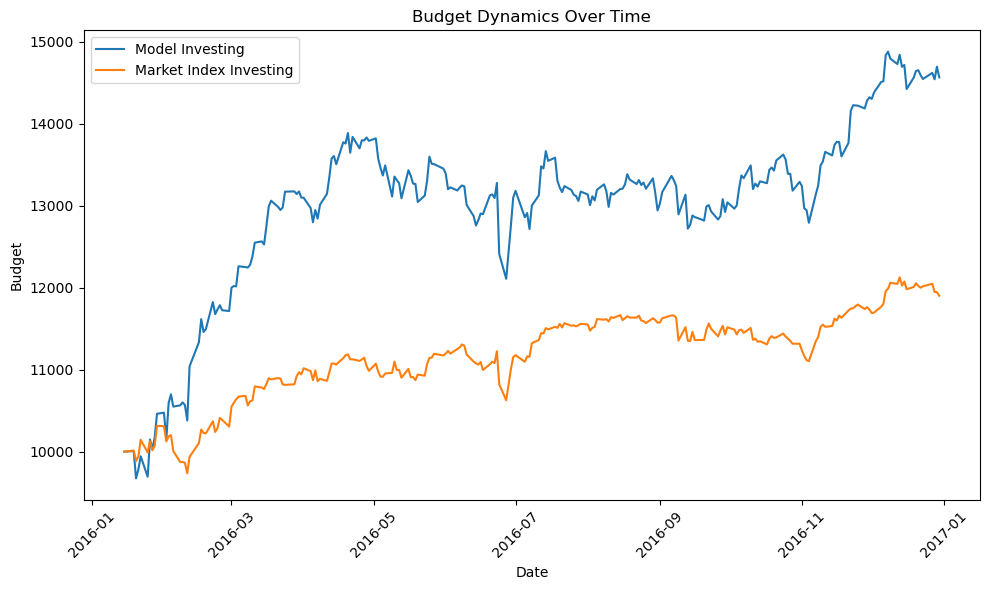

In [12]:
from scripts.simulator import TradingSimulator
import pytorch_lightning as pl


# Путь к файлу сохраненной модели
checkpoint_path = './model_checkpoint/best-epoch=17-val_prec=0.48.ckpt'#'best-epoch=14-val_prec=0.42-v1.ckpt'

# Загрузка модели
model = TrainingModule.load_from_checkpoint(checkpoint_path,
                                            beta_hyp=beta_hyp,
    global_context_index=global_context_index,  # Assuming this is an index, adjust accordingly.
    input_dim=input_dim,  # The number of features per stock.
    hidden_dim=hidden_dim,  # Size of the hidden layers.
    num_stocks=num_stocks,
    num_heads=num_heads,  # Number of attention heads.
    num_layers=num_layers,  # Number of LSTM layers.
    learning_rate=learning_rate,
    pos_weight_factor = pos_weight_factor,
    lambda_reg=lambda_reg)

data_dir = './data/features'
start_date='2016-01-01' 
end_date = '2017-01-01' 
best_stock_number = 3
budget = 10_000

sim = TradingSimulator(model, data_dir, market_index_name, start_date, end_date, seq_len, best_stock_number, budget)

sim.setup()
sim.plot_budget_dynamics()